Enter keyword to search about: chatgpt
Enter how many tweets to analyze: 50
How people are reacting on chatgpt by analyzing 50 Tweets.
Positive


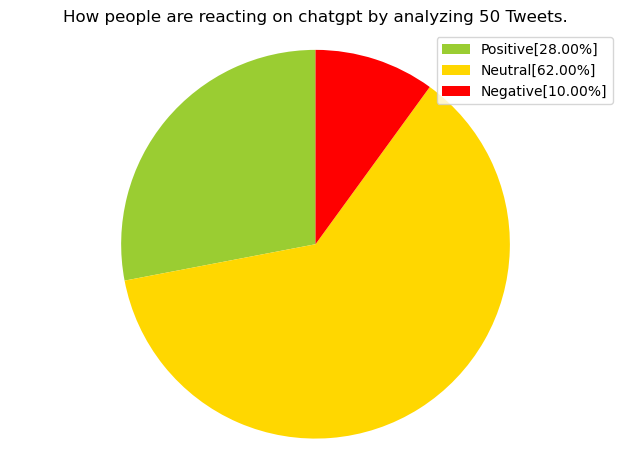

In [10]:
import sys,tweepy 
from textblob import TextBlob
import matplotlib.pyplot as plt 

def percentage(part,whole):
    return 100* float(part)/float(whole)

twitterApiKey="DhmqbegPXVBGp8ucsv7kOtOYU"
twitterApiSecret="xA020YA29bRFERarTwLZalvatJRxz3TnDBjZOW0yMntHdJaOkO"
twitterApiAccessToken="362986809-mAwprA0thb7K6tOKhG0NbnAUmxpNF4wfvXN8uPya"
twitterApiAccessTokenSecret="FttV2JF9gkID87TfKMILKFuCRoIJhNmX6OiiHCRiQV08n"

auth=tweepy.OAuthHandler(twitterApiKey,twitterApiSecret)
auth.set_access_token(twitterApiAccessToken,twitterApiAccessTokenSecret)
api=tweepy.API(auth)

searchTerm=input("Enter keyword to search about: ")
noOfSearchTerms=int(input("Enter how many tweets to analyze: "))

tweets=tweepy.Cursor(api.search_tweets, q=searchTerm,).items(noOfSearchTerms)

positive=0
negative=0
neutral=0
polarity=0

for tweet in tweets:
    analysis=TextBlob(tweet.text)
    polarity+=analysis.sentiment.polarity
    
    if(analysis.sentiment.polarity == 0):
        neutral+=1
    elif(analysis.sentiment.polarity < 0.00):
        negative+=1
    elif(analysis.sentiment.polarity > 0.00):
        positive+=1
positive=percentage(positive,noOfSearchTerms)
negative=percentage(negative,noOfSearchTerms)
neutral=percentage(neutral,noOfSearchTerms)

positive=format(positive,'.2f')
neutral=format(neutral,'.2f')
negative=format(negative,'.2f')

print("How people are reacting on " +searchTerm+" by analyzing "+str(noOfSearchTerms)+" Tweets.")

if(polarity == 0):
    print("Neutral")
if(polarity < 0):
    print("Negative")
if(polarity > 0):
    print("Positive")

labels=['Positive['+str(positive)+'%]','Neutral['+str(neutral)+'%]','Negative['+str(negative)+'%]']
sizes=[positive,neutral,negative]
colors=['yellowgreen','gold','red']
patches,texts=plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("How people are reacting on " +searchTerm+" by analyzing "+str(noOfSearchTerms)+" Tweets.")
plt.axis('equal')
plt.tight_layout()
plt.savefig("Keyword_analysis2.png")
plt.show()